In [61]:
from unit_analysis import *


# #Richmond, VA
# fdid = '76000'
# state = 'VA'
# firecares_id = '93345'


fdid = '05900'
state = 'VA'
firecares_id = '81147'


rich = unit_analysis(firecares_id,fdid,state,load_all=False)
rich.apparatus_query(load_dir='./apparatus_df')
rich.first_due_analysis()
rich.station_maker()

Acquiring deprartment's jurisdictional boundary...
Done! 

Running the algorithm to find units active at the start of each incident


100%|██████████| 539775/539775 [45:29<00:00, 197.73it/s]  


Done!
Acquiring information about status of first due station for each incident...
Done!


/home/tyler/venv/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/tyler/fire_data_analysis/unit_analysis/unit_analysis.py:565: RuntimeWarning: invalid value encountered in true_divide
  self.first_due_probs = self.first_due_probs/np.sum(self.first_due_probs)


In [45]:
# rich.first_due_analysis()
rich.station_maker()

In [46]:
dir(rich)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__inprogressatstart__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'active_stations',
 'apparatus_df',
 'apparatus_query',
 'apparatus_station',
 'boundary',
 'boundary_query',
 'fdid',
 'firecares_id',
 'first_due_analysis',
 'first_due_df',
 'first_due_plot',
 'first_due_probs',
 'first_due_stats',
 'state',
 'station_list',
 'station_maker',
 'station_objects',
 'station_plot',
 'time_simulator',
 'unit_type',
 'verified']

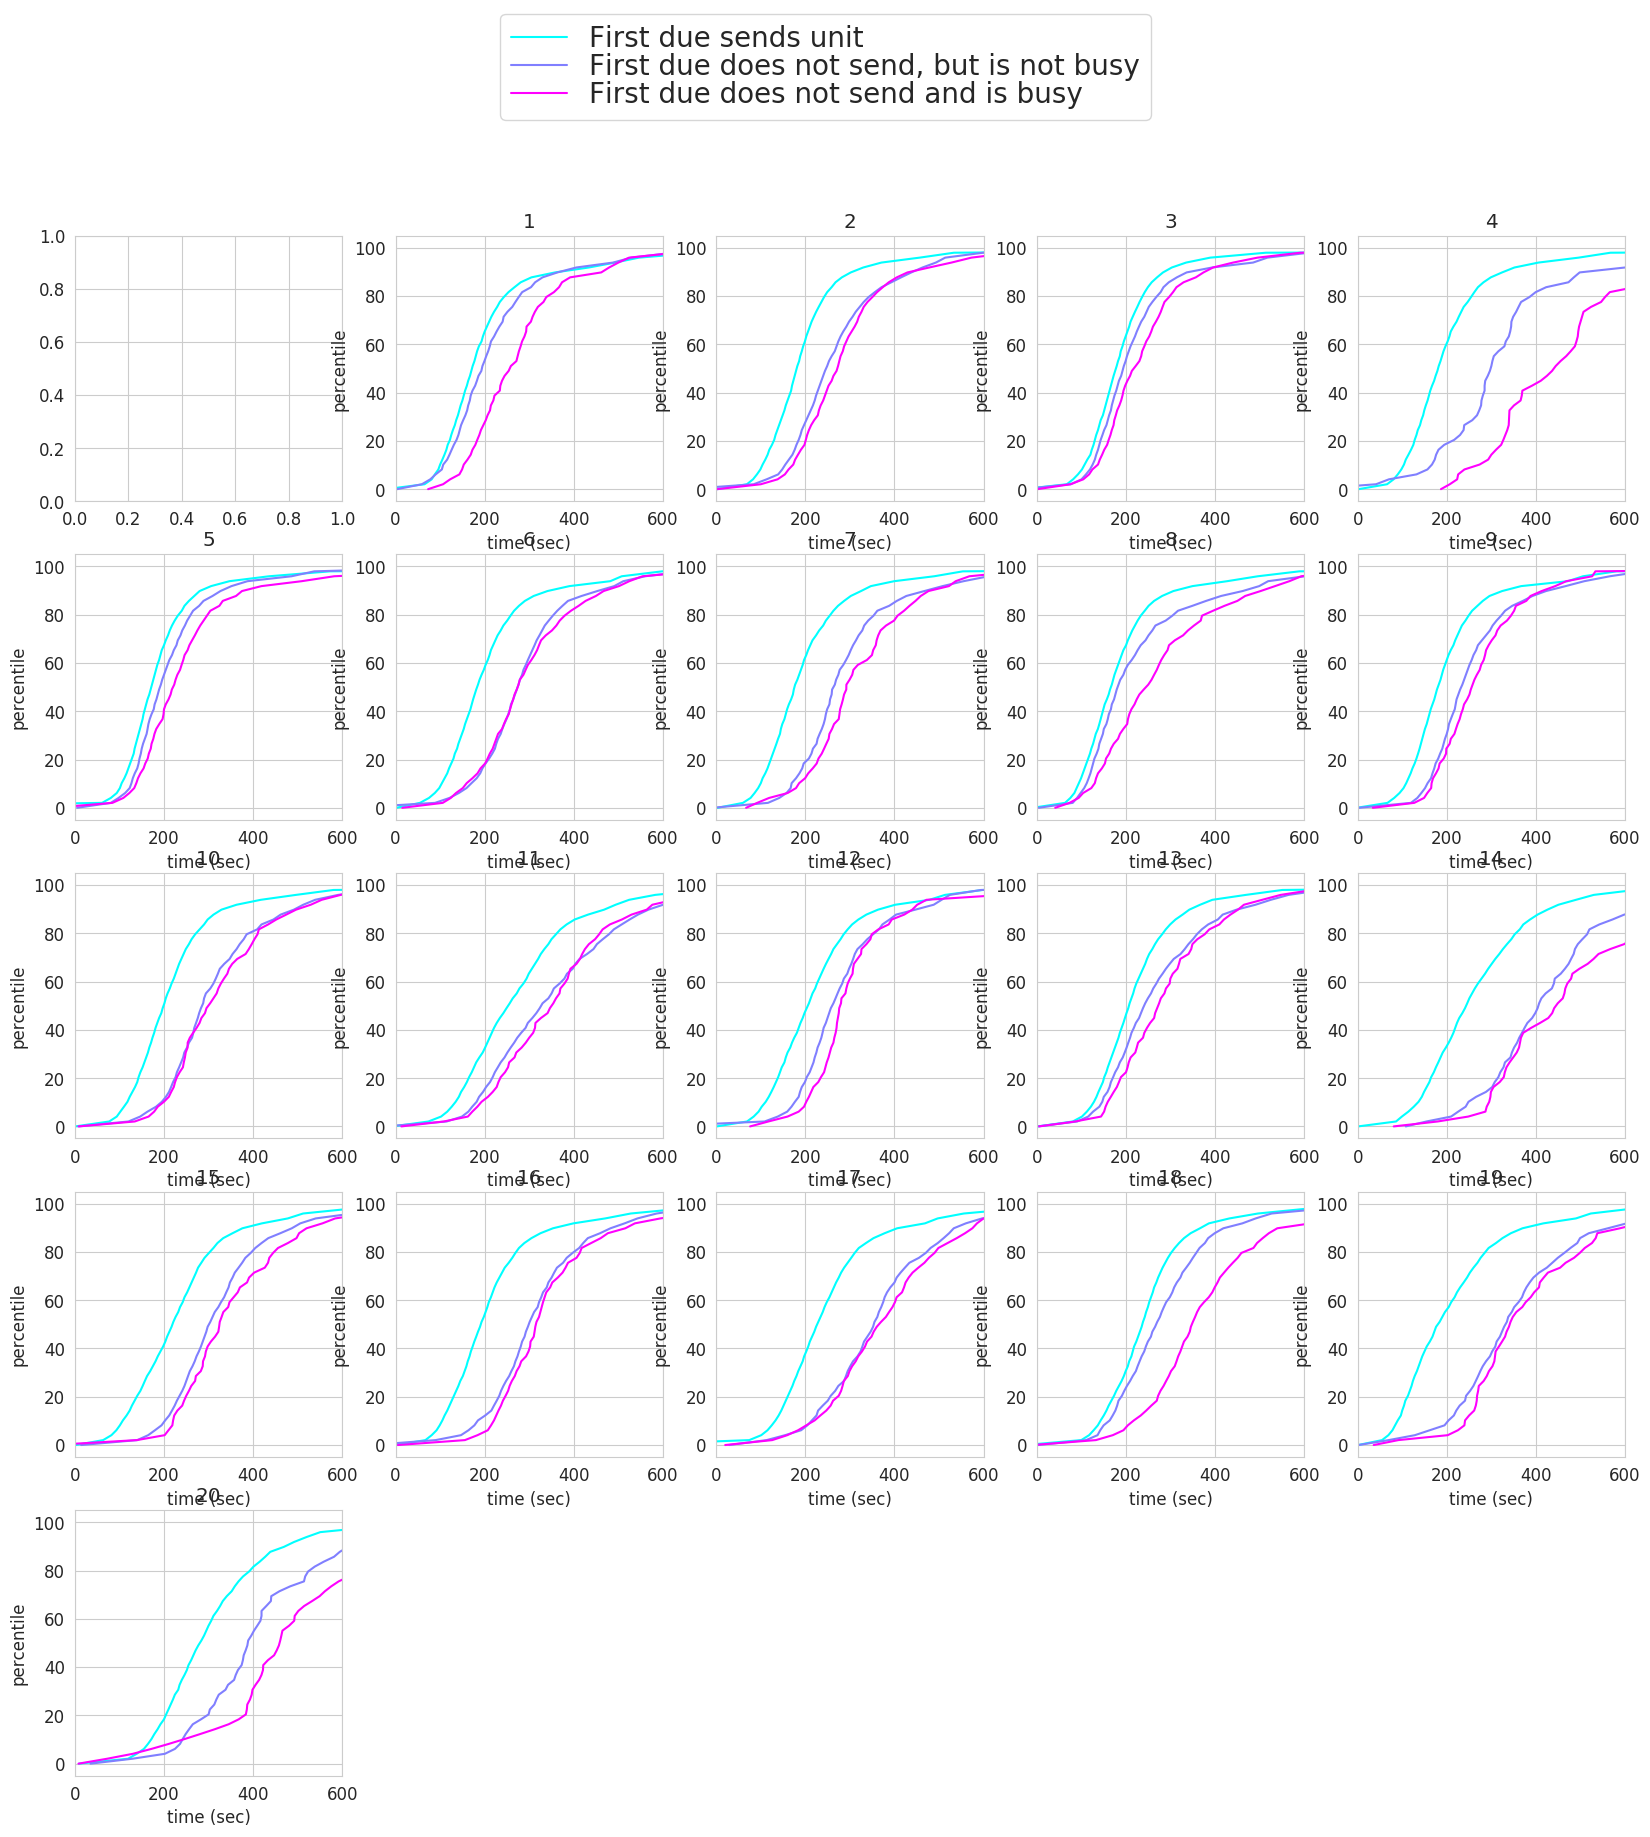

In [57]:
from matplotlib import rcParams, cycler
plt.rcParams.update({'font.size': 12})
cmap = plt.cm.cool
plt.rcParams['figure.figsize'] = [20,20]
rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 3)))




for i,station in enumerate(rich.station_objects):
    plt.subplot(5,5,i+1)

    try:
        x = station.sent_unit_times
        y =station.no_unit_not_busy
        z = station.no_unit_and_busy

        percentiles = np.linspace(0,100)
        sent_times = np.percentile(x,percentiles)
        no_unit_not_busy = np.percentile(y,percentiles)
        no_unit_busy = np.percentile(z,percentiles)



        l1 = plt.plot(sent_times, percentiles)
        l2 = plt.plot(no_unit_not_busy, percentiles)
        l3 = plt.plot(no_unit_busy, percentiles)
        plt.xlim([0,600])
        plt.xlabel('time (sec)')
        plt.ylabel('percentile')
        plt.title(str(i))
    except IndexError:
        pass
    
lines = [l1[0],l2[0],l3[0]]
legend_list = ['First due sends unit', 'First due does not send, but is not busy', 'First due does not send and is busy']
plt.figlegend( lines, legend_list, loc = 'upper center', ncol=1, labelspacing=0. ,prop={'size': 20})
# plt.legend(,loc=1)


In [14]:
dir(rich.station_objects[1])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'first_due_prob',
 'geom',
 'no_unit_and_busy',
 'no_unit_not_busy',
 'reliability',
 'sent_unit_times',
 'station_df',
 'timedraw']

In [48]:
times = np.percentile(x,percentiles)

In [49]:
rich.station_objects[1].first_due_prob

0.04312492172388361

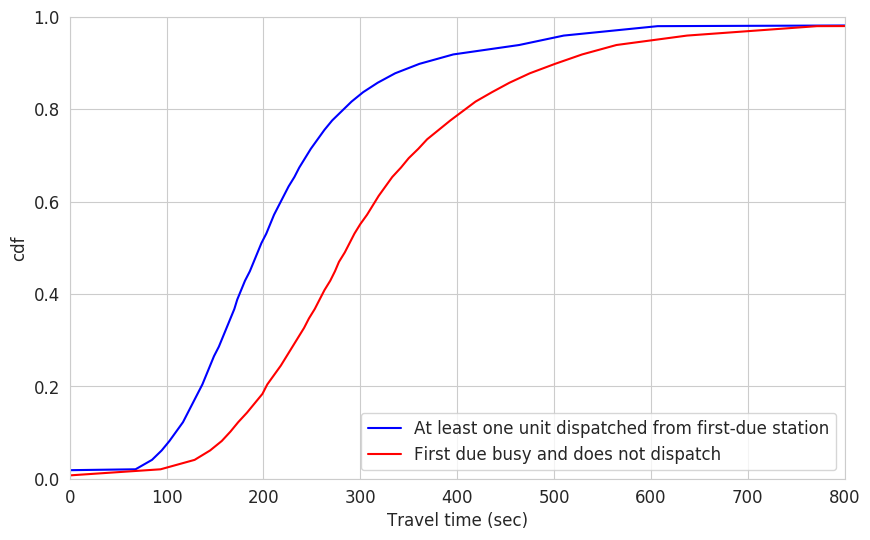

The expected improvement to the 90th percentile travel time is at most 37 seconds


In [50]:
rich.first_due_plot()

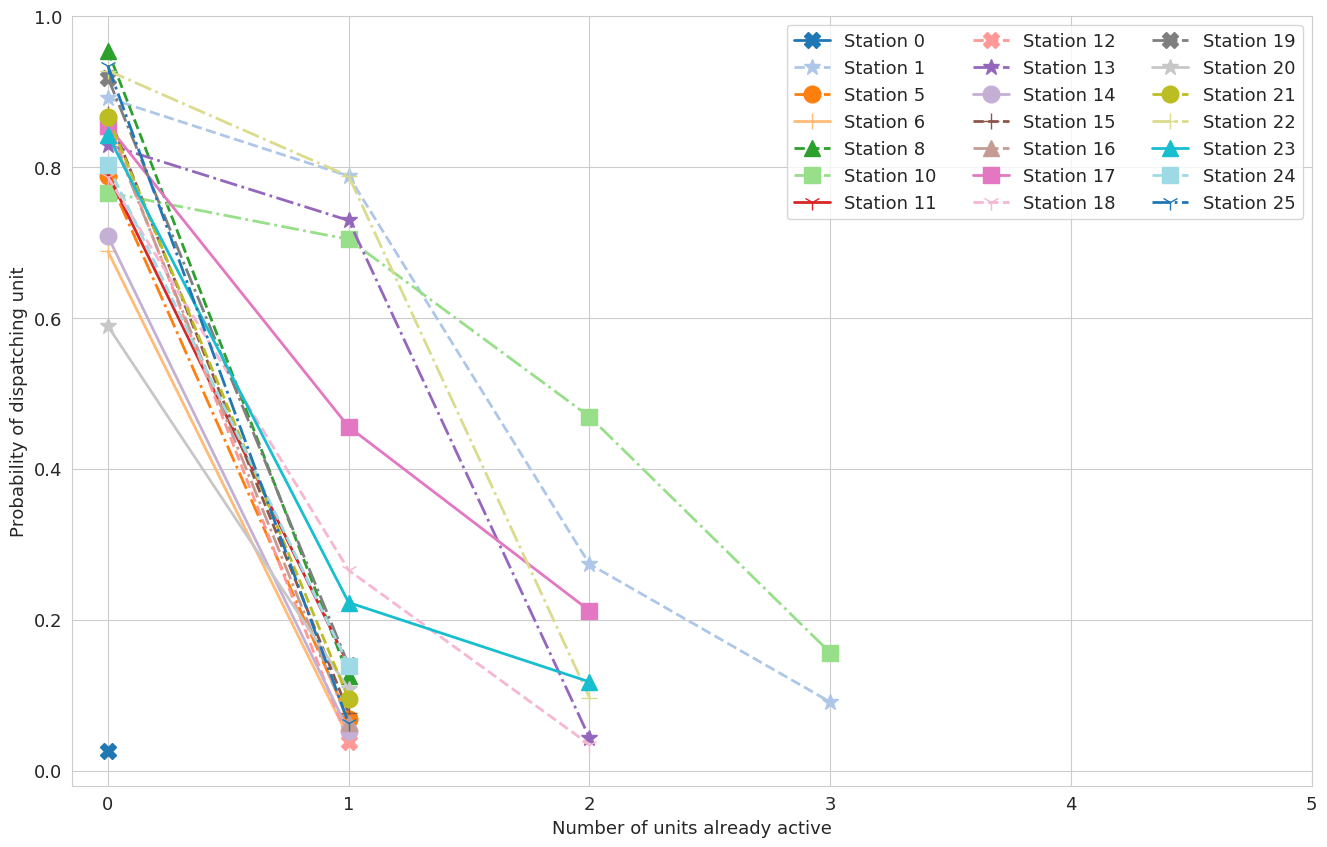

<Figure size 1600x1000 with 0 Axes>

In [51]:
rich.station_plot()

In [ ]:
np.sum(rich.apparatus_df['unit_type']=='Engine')/len(rich.apparatus_df)

In [18]:
np.unique(rich.apparatus_df['unit_type'])

array(['Brush Truck', 'Chief Officer', 'Engine', 'Foam Unit',
       'Hazmat Unit', 'Light and Air Unit', 'Mobile Command Post',
       'Rescue Unit', 'Safety Officer', 'Support Unit', 'Truck/Aerial',
       'Unknown'], dtype=object)

The expected improvement to the 90th percentile travel time is -1 seconds


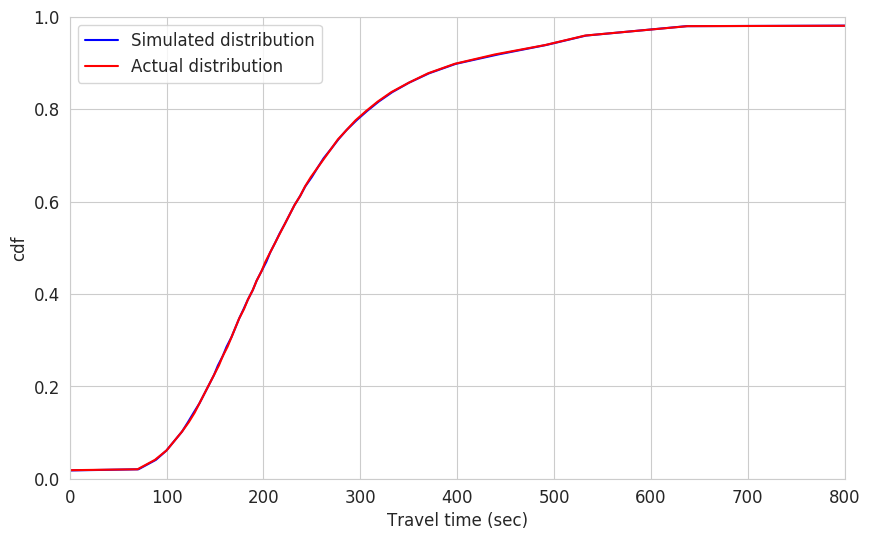

In [52]:
rich.time_simulator(num_iter=70000)

In [62]:
#Modifying station reliability
for i,station_num in enumerate(rich.station_list):
    rich.station_objects[i].reliability['dispatch_prob'] = np.ones(len(rich.station_objects[i].reliability['dispatch_prob']))
rich.time_simulator(num_iter=70000)

ValueError: probabilities contain NaN

In [ ]:
rich.station_objects[i].reliability['dispatch_prob'] = np.ones(len(rich.station_objects[i].reliability['dispatch_prob']))

In [54]:
df = rich.first_due_df[(rich.first_due_df['first_due_busy']==True) & (rich.first_due_df['any_from_first_due']==False)  ].copy()
no_due_and_busy = heatmap(df,y_pred='travel_time',boundary=rich.boundary,cutoff_num=20,cutoff_rad=.5)

df = rich.first_due_df[(rich.first_due_df['any_from_first_due']==True)].copy()
first_due = heatmap(df,y_pred='travel_time',boundary=rich.boundary,cutoff_num=20,cutoff_rad=.5)

In [22]:
dir(first_due)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'density',
 'latlocs',
 'longlocs',
 'y_pred']

In [55]:
import numpy as np
import pandas as pd
import folium
import branca
from folium import plugins
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import geojsoncontour
import scipy as sp
import scipy.ndimage
import matplotlib as mpl




n=100
#Need to reshape data
y_grid = np.reshape(no_due_and_busy.y_pred-first_due.y_pred,[n,n]).T
vmin   = np.nanmin(y_grid)
vmax   = np.nanmax(y_grid)


# Setup colormap
levels = 20
cmap = mpl.cm.get_cmap('coolwarm')
colors = [mpl.colors.rgb2hex(cmap(i)) for i in np.linspace(0,1,levels)]
cm     = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)


#Then making the contour plot
contourf = plt.contourf(first_due.longlocs,first_due.latlocs,y_grid,levels=levels,colors=colors,linestyles=None,vmin=vmin,vmax=vmax)







# Convert matplotlib contourf to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=0,
    ndigits=10,
    stroke_width=0,
    fill_opacity=0)

# Set up the folium plot
geomap = folium.Map([np.mean(first_due.latlocs), np.mean(first_due.longlocs)], zoom_start=10, tiles="cartodbpositron")

# Plot the contour plot on folium
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
#         'weight': .5,
#         'opacity': .5,
        'fillColor': x['properties']['fill'],
        'fillOpacity': .5
,
    }).add_to(geomap)

# Add the colormap to the folium map
cm.caption = 'Avg. delay due to first-due station being busy and unable to dispatch (sec)'
geomap.add_child(cm)


for i in rich.station_objects:
    try:
        folium.Marker(
            location = [ i.geom.coords[0][1],  i.geom.coords[0][0]],
            icon=folium.Icon(color='red',icon='fire'),
    #         tooltip=tooltip
        ).add_to(geomap)
    except(AttributeError):
        pass




# Fullscreen mode
plugins.Fullscreen(position='topright', force_separate_button=True).add_to(geomap)


# Plot the contour plot on folium
folium.GeoJson(
    rich.boundary,
    style_function=lambda x: {
        'color':     'black',
        'weight':   5,
#         'fillColor': x['properties']['fill'],
        'fillOpacity': 0.0,
    }).add_to(geomap)




plt.close()
geomap



# Integration check
The area integral of the density should be close (but less than) the total number of incidents

In [ ]:
delta_x = xlocs[1] - xlocs[0]
delta_y = ylocs[1] - ylocs[0]
area = delta_x*delta_y
areas = np.ones(len(density_full))*area
np.nansum(areas*density_full)

In [ ]:
len(df)

In [ ]:
station_df.iloc[0]

In [ ]:
rich.station_list[0] == station_df.iloc[0]['station_number']

In [ ]:
station_df.iloc[np.where(rich.station_list == station_df.iloc[0]['station_number'])[0][0]]['geom']

In [ ]:
station_df.iloc[np.where(station_df['station_number'] == 100)[0][0]]['geom']

In [20]:
import numpy as np
import pandas as pd
import folium
import branca
from folium import plugins
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import geojsoncontour
import scipy as sp
import scipy.ndimage
import matplotlib as mpl





#Need to reshape data
y_grid = np.reshape(test.y_pred,[n,n]).T
vmin   = np.nanmin(y_grid)
vmax   = np.nanmax(y_grid)


# Setup colormap
levels = 20
cmap = mpl.cm.get_cmap('coolwarm')
colors = [mpl.colors.rgb2hex(cmap(i)) for i in np.linspace(0,1,levels)]
cm     = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)


#Then making the contour plot
contourf = plt.contourf(test.longlocs,test.latlocs,y_grid,levels=levels,colors=colors,linestyles=None,vmin=vmin,vmax=vmax)







# Convert matplotlib contourf to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=0,
    ndigits=10,
    stroke_width=0,
    fill_opacity=0)

# Set up the folium plot
geomap = folium.Map([np.mean(test.latlocs), np.mean(test.longlocs)], zoom_start=10, tiles="cartodbpositron")

# Plot the contour plot on folium
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
#         'weight': .5,
#         'opacity': .5,
        'fillColor': x['properties']['fill'],
        'fillOpacity': .5
,
    }).add_to(geomap)

# Add the colormap to the folium map
cm.caption = 'Avg. delay due to first-due station being busy and unable to dispatch (sec)'
geomap.add_child(cm)


for i in rich.station_objects:
    try:
        folium.Marker(
            location = [ i.geom.coords[0][1],  i.geom.coords[0][0]],
            icon=folium.Icon(color='red',icon='fire'),
    #         tooltip=tooltip
        ).add_to(geomap)
    except(AttributeError):
        pass




# Fullscreen mode
plugins.Fullscreen(position='topright', force_separate_button=True).add_to(geomap)


# Plot the contour plot on folium
folium.GeoJson(
    rich.boundary,
    style_function=lambda x: {
        'color':     'black',
        'weight':   5,
#         'fillColor': x['properties']['fill'],
        'fillOpacity': 0.0,
    }).add_to(geomap)




plt.close()
geomap


NameError: name 'test' is not defined